In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/codegoalno1/submissiongr.csv
/kaggle/input/codegoalno1/__results__.html
/kaggle/input/codegoalno1/logspaceship_titanic_l.csv
/kaggle/input/codegoalno1/submissionr.csv
/kaggle/input/codegoalno1/__notebook__.ipynb
/kaggle/input/codegoalno1/__output__.json
/kaggle/input/codegoalno1/submissionkn.csv
/kaggle/input/codegoalno1/logspaceship_titanic_s.csv
/kaggle/input/codegoalno1/submissiondct.csv
/kaggle/input/codegoalno1/custom.css
/kaggle/input/codegoalno1/__results___files/__results___174_1.png
/kaggle/input/codegoalno1/__results___files/__results___179_0.png
/kaggle/input/codegoalno1/__results___files/__results___163_0.png
/kaggle/input/codegoalno1/__results___files/__results___152_1.png
/kaggle/input/codegoalno1/__results___files/__results___14_1.png
/kaggle/input/codegoalno1/__results___files/__results___176_0.png
/kaggle/input/codegoalno1/__results___files/__results___64_1.png
/kaggle/input/codegoalno1/__results___files/__results___157_1.png
/kaggle/input/codegoalno1/__r

# **創造環境**

In [2]:
!pip install mglearn
import mglearn
!pip install scikit-learn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_blobs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 752.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=f09807f46cf26287661e3c0e87932f9ae496266790f97a06fdd1129b14b22b87
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


# **訓練集**

In [3]:
train_text = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
print(len(train_text))
train_text.head()

8693


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# **引入 sns**

In [4]:
import seaborn as sns

# **觀察那些缺失值 (可視化)**

<AxesSubplot:>

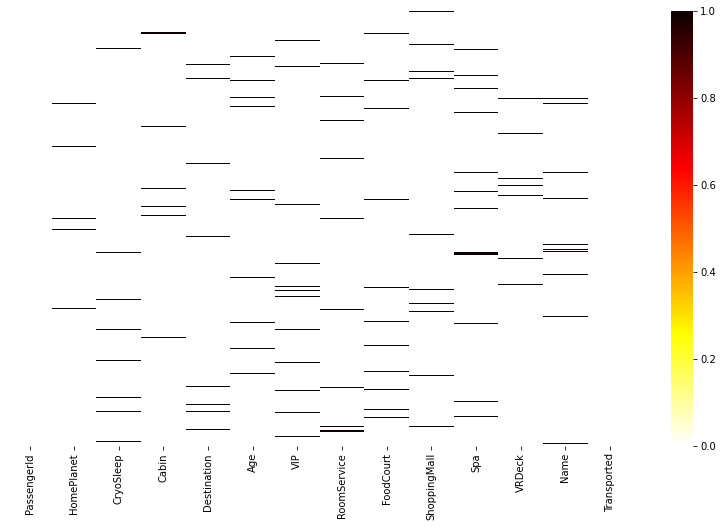

In [5]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

# **觀察各係數的關係(訓練集)**

<AxesSubplot:>

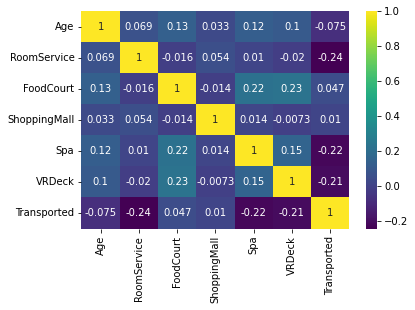

In [6]:
sns.heatmap(train_text.corr(),annot = True,cmap="viridis")

# **測試集**

In [7]:
test_text = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
print(len(test_text))
test_text.head()

4277


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


# **觀察那些缺失值 (可視化)**

<AxesSubplot:>

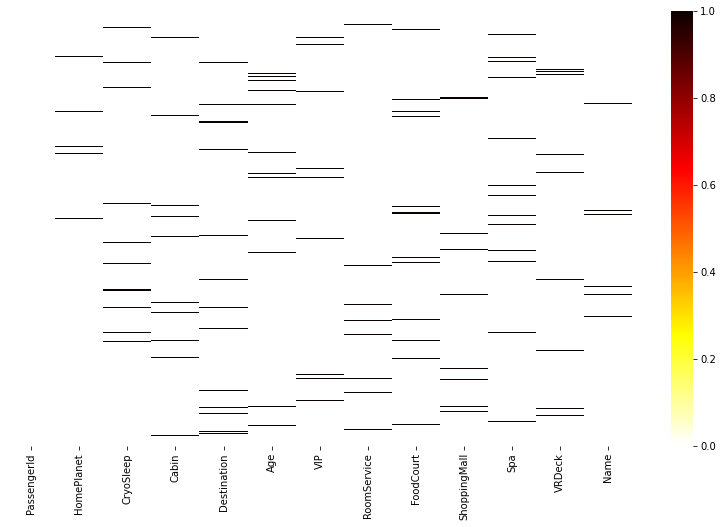

In [8]:
plt.figure(figsize=(14,8))
sns.heatmap(test_text.isnull(), yticklabels=False, cmap='hot_r')

# **觀察各係數的關係(測試集)**

<AxesSubplot:>

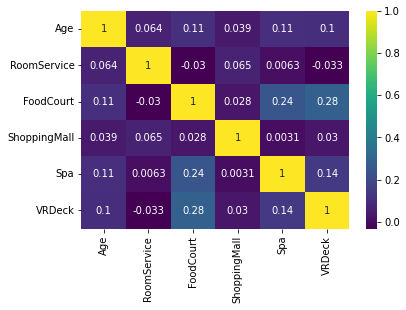

In [9]:
sns.heatmap(test_text.corr(),annot = True,cmap="viridis")

# **sample 範例 輸出**

In [10]:
sample_text = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
print(len(sample_text))
sample_text.head()

4277


,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


# **訓練集內容**

In [11]:
print(train_text.HomePlanet.value_counts())

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64


In [12]:
print(train_text.CryoSleep.value_counts())

False    5439
True     3037
Name: CryoSleep, dtype: int64


In [13]:
print(train_text.Cabin.value_counts())

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


In [14]:
print(train_text.Destination.value_counts())

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64


In [15]:
print(train_text.Age.value_counts())

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


In [16]:
print(train_text.VIP.value_counts())

False    8291
True      199
Name: VIP, dtype: int64


In [17]:
print(train_text.RoomService.value_counts())

0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64


In [18]:
print(train_text.FoodCourt.value_counts())

0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
3846.0       1
5193.0       1
312.0        1
827.0        1
4688.0       1
Name: FoodCourt, Length: 1507, dtype: int64


In [19]:
print(train_text.ShoppingMall.value_counts())

0.0       5587
1.0        153
2.0         80
3.0         59
4.0         45
          ... 
3627.0       1
2074.0       1
871.0        1
742.0        1
1872.0       1
Name: ShoppingMall, Length: 1115, dtype: int64


In [20]:
print(train_text.Spa.value_counts())

0.0       5324
1.0        146
2.0        105
5.0         53
3.0         53
          ... 
273.0        1
2581.0       1
2948.0       1
3778.0       1
1643.0       1
Name: Spa, Length: 1327, dtype: int64


In [21]:
print(train_text.VRDeck.value_counts())

0.0       5495
1.0        139
2.0         70
3.0         56
5.0         51
          ... 
408.0        1
876.0        1
2891.0       1
2102.0       1
3235.0       1
Name: VRDeck, Length: 1306, dtype: int64


In [22]:
print(train_text.Transported.value_counts())

True     4378
False    4315
Name: Transported, dtype: int64


# **測試集內容**

In [23]:
print(test_text.HomePlanet.value_counts())

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64


In [24]:
print(test_text.CryoSleep.value_counts())

False    2640
True     1544
Name: CryoSleep, dtype: int64


In [25]:
print(test_text.Cabin.value_counts())

G/160/P     8
D/273/S     7
B/31/P      7
G/748/S     7
E/228/S     7
           ..
E/236/S     1
F/650/S     1
G/566/P     1
G/557/S     1
G/1498/S    1
Name: Cabin, Length: 3265, dtype: int64


In [26]:
print(test_text.Destination.value_counts())

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64


In [27]:
print(train_text.Age.value_counts())

24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64


In [28]:
print(test_text.VIP.value_counts())

False    4110
True       74
Name: VIP, dtype: int64


In [29]:
print(test_text.RoomService.value_counts())

0.0       2726
1.0         68
2.0         34
3.0         28
4.0         24
          ... 
1454.0       1
6438.0       1
2647.0       1
1338.0       1
147.0        1
Name: RoomService, Length: 842, dtype: int64


In [30]:
print(test_text.FoodCourt.value_counts())

0.0        2690
1.0          59
2.0          30
4.0          22
3.0          21
           ... 
842.0         1
1624.0        1
20809.0       1
6564.0        1
2680.0        1
Name: FoodCourt, Length: 902, dtype: int64


In [31]:
print(test_text.ShoppingMall.value_counts())

0.0       2744
1.0         72
3.0         35
2.0         32
4.0         24
          ... 
936.0        1
508.0        1
2183.0       1
2451.0       1
3851.0       1
Name: ShoppingMall, Length: 715, dtype: int64


In [32]:
print(test_text.Spa.value_counts())

0.0       2611
1.0         72
2.0         43
3.0         29
4.0         27
          ... 
2882.0       1
2061.0       1
3745.0       1
3560.0       1
168.0        1
Name: Spa, Length: 833, dtype: int64


In [33]:
print(test_text.VRDeck.value_counts())

0.0       2757
1.0         72
2.0         38
3.0         33
7.0         23
          ... 
1004.0       1
1297.0       1
1397.0       1
2019.0       1
104.0        1
Name: VRDeck, Length: 796, dtype: int64


# **觀察缺失值**

In [34]:
train_text.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [35]:
test_text.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# **各數據集參數值型態**

In [36]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [37]:
test_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


# **數據集連續數值平均數**

In [38]:
train_text.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [39]:
test_text.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


# **HomePlanet缺失值觀看**

In [40]:
print(train_text[train_text.HomePlanet.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
59       0064_02        NaN      True     E/3/S  TRAPPIST-1e  33.0  False   
113      0119_01        NaN     False     A/0/P  TRAPPIST-1e  39.0  False   
186      0210_01        NaN      True     D/6/P  55 Cancri e  24.0  False   
225      0242_01        NaN     False    F/46/S  TRAPPIST-1e  18.0  False   
234      0251_01        NaN      True    C/11/S  55 Cancri e  54.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
8515     9084_01        NaN     False   E/582/P  TRAPPIST-1e  25.0  False   
8613     9194_01        NaN     False   E/603/S  55 Cancri e  53.0  False   
8666     9248_01        NaN     False  F/1792/S  55 Cancri e  38.0    NaN   
8674     9257_01        NaN     False  F/1892/P  TRAPPIST-1e  13.0  False   
8684     9274_01        NaN      True  G/1508/P  TRAPPIST-1e  23.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck             Name 

In [41]:
print(test_text[test_text.HomePlanet.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
276      0616_01        NaN     False    E/40/S  TRAPPIST-1e  31.0  False   
340      0730_01        NaN     False   F/135/S  TRAPPIST-1e  44.0  False   
450      0936_01        NaN     False   F/171/S  TRAPPIST-1e  20.0  False   
464      0967_01        NaN     False   F/180/S  TRAPPIST-1e  19.0  False   
481      1021_01        NaN     False   F/192/S  TRAPPIST-1e  23.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
3957     8621_01        NaN     False   E/552/P  TRAPPIST-1e  19.0  False   
3980     8678_01        NaN      True  G/1399/S  55 Cancri e   9.0  False   
4032     8775_01        NaN      True   D/275/P  TRAPPIST-1e  40.0  False   
4159     9025_01        NaN     False  G/1454/S  TRAPPIST-1e  42.0  False   
4213     9146_01        NaN     False  F/1874/P  TRAPPIST-1e  52.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Na

# **缺失值處理**

# ***連續性data 缺失值取平均&中位數值***

In [42]:
float_data = ['Age']
train_text[float_data] = train_text[float_data].fillna(train_text[float_data].mean())

In [43]:
float_data = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
train_text[float_data] = train_text[float_data].fillna(train_text[float_data].median())

# **將浮點數轉為整數**


In [44]:
train_text=train_text.astype({'Age': int,'RoomService': int,'FoodCourt': int,'ShoppingMall': int,'Spa': int,'VRDeck': int})

In [45]:
train_text.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True


# **連續值參數處理完成(可視圖)**

<AxesSubplot:>

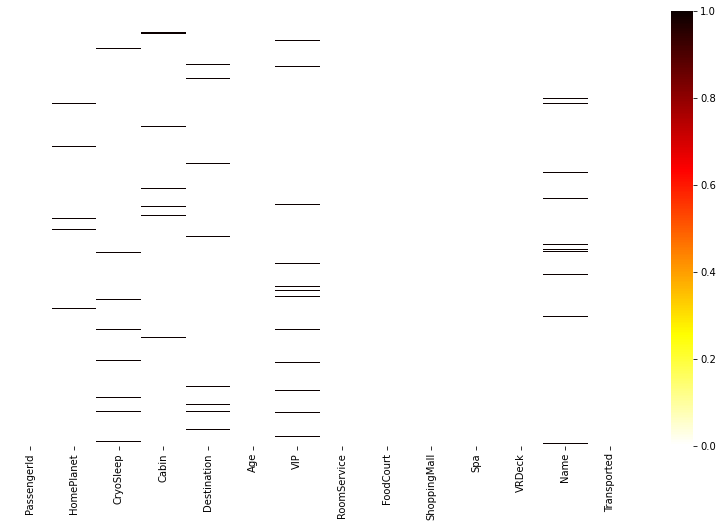

In [46]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

In [47]:
train_text.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [48]:
print(train_text[train_text.VIP.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin    Destination  Age  VIP  \
38       0036_01      Earth     False     F/8/S    55 Cancri e   15  NaN   
102      0108_03      Earth     False    G/19/S    TRAPPIST-1e    0  NaN   
145      0165_01       Mars      True    F/37/P    TRAPPIST-1e   35  NaN   
228      0244_02       Mars      True    F/47/S    55 Cancri e   14  NaN   
566      0593_01       Mars     False    D/24/P    TRAPPIST-1e   28  NaN   
...          ...        ...       ...       ...            ...  ...  ...   
8494     9074_01      Earth      True  G/1460/S    TRAPPIST-1e    0  NaN   
8512     9081_06      Earth     False  F/1858/P  PSO J318.5-22   16  NaN   
8542     9122_01      Earth      True  G/1469/S    55 Cancri e   55  NaN   
8630     9205_03     Europa      True   B/300/P    TRAPPIST-1e   52  NaN   
8666     9248_01        NaN     False  F/1792/S    55 Cancri e   38  NaN   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck               Name  \
38       

In [49]:
print(test_text[test_text.HomePlanet.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
276      0616_01        NaN     False    E/40/S  TRAPPIST-1e  31.0  False   
340      0730_01        NaN     False   F/135/S  TRAPPIST-1e  44.0  False   
450      0936_01        NaN     False   F/171/S  TRAPPIST-1e  20.0  False   
464      0967_01        NaN     False   F/180/S  TRAPPIST-1e  19.0  False   
481      1021_01        NaN     False   F/192/S  TRAPPIST-1e  23.0  False   
...          ...        ...       ...       ...          ...   ...    ...   
3957     8621_01        NaN     False   E/552/P  TRAPPIST-1e  19.0  False   
3980     8678_01        NaN      True  G/1399/S  55 Cancri e   9.0  False   
4032     8775_01        NaN      True   D/275/P  TRAPPIST-1e  40.0  False   
4159     9025_01        NaN     False  G/1454/S  TRAPPIST-1e  42.0  False   
4213     9146_01        NaN     False  F/1874/P  TRAPPIST-1e  52.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Na

# **連續值缺失處理**

In [50]:
float_data = ['Age']
test_text[float_data] = test_text[float_data].fillna(test_text[float_data].mean())

In [51]:
float_data = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']
test_text[float_data] = test_text[float_data].fillna(test_text[float_data].median())

In [52]:
test_text=test_text.astype({'Age': int,'RoomService': int,'FoodCourt': int,'ShoppingMall': int,'Spa': int,'VRDeck': int})

In [53]:
test_text.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

<AxesSubplot:>

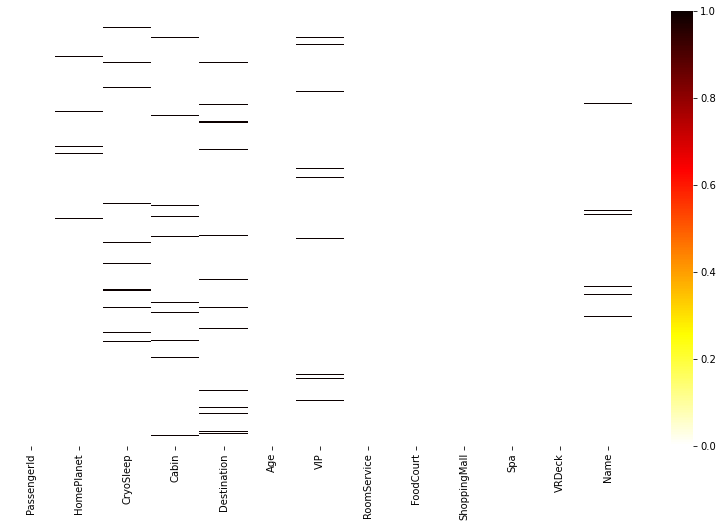

In [54]:
plt.figure(figsize=(14,8))
sns.heatmap(test_text.isnull(), yticklabels=False, cmap='hot_r')

In [55]:
test_text.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez


Deck 甲板

Side 邊

# **處理Cabin 內容**

In [56]:
print(train_text[train_text.Cabin.isnull()])

     PassengerId HomePlanet CryoSleep Cabin  Destination  Age    VIP  \
15       0012_01      Earth     False   NaN  TRAPPIST-1e   31  False   
93       0101_01       Mars      True   NaN  TRAPPIST-1e   31  False   
103      0110_01     Europa     False   NaN  TRAPPIST-1e   32  False   
222      0239_01       Mars     False   NaN  TRAPPIST-1e   37  False   
227      0244_01       Mars      True   NaN  TRAPPIST-1e   43  False   
...          ...        ...       ...   ...          ...  ...    ...   
8209     8772_02     Europa     False   NaN  55 Cancri e   53  False   
8475     9057_01     Europa     False   NaN  55 Cancri e   36   True   
8485     9069_03     Europa      True   NaN  55 Cancri e   25  False   
8509     9081_03      Earth      True   NaN  TRAPPIST-1e    1  False   
8656     9233_01      Earth     False   NaN  TRAPPIST-1e   41  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck               Name  \
15             32          0           876     0       0

# **將Cabin 的內容分開**

In [57]:
train_text['Cabin'].fillna('-',inplace=True)

train_text['Deck'] = train_text['Cabin'].apply(lambda x : x[:1])
train_text['Num'] = train_text['Cabin'].apply(lambda x :x[-3:-2])
train_text['Num'].fillna('-',inplace=True)
train_text['Side'] = train_text['Cabin'].apply(lambda x : x[-1:])


In [58]:
train_text['Num'].fillna('-',inplace=True)

In [59]:
train_text.head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28,False,0,0,0,0,0,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True,B,1,P


In [60]:
test_text['Cabin'].fillna('-',inplace=True)

test_text['Deck'] = test_text['Cabin'].apply(lambda x : x[:1])
test_text['Num'] = test_text['Cabin'].apply(lambda x :x[-3:-2])
test_text['Num'].fillna('-',inplace=True)
test_text['Side'] = test_text['Cabin'].apply(lambda x : x[-1:])


In [61]:
test_text.head(30)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,F,5,S
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31,False,0,1615,263,113,60,Karlen Ricks,F,7,P
6,0029_01,Europa,True,B/2/P,55 Cancri e,21,False,0,0,0,0,0,Aldah Ainserfle,B,2,P
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20,False,0,0,0,0,0,Acrabi Pringry,D,0,S
8,0032_02,Europa,True,D/0/S,55 Cancri e,23,False,0,0,0,0,0,Dhena Pringry,D,0,S
9,0033_01,Earth,False,F/7/S,55 Cancri e,24,False,0,639,0,0,0,Eliana Delazarson,F,7,S


In [62]:
train_text.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin             0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [63]:
test_text.isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin            0
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

# **處理 HomePlanet 缺失值**

In [64]:
train_text.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [65]:
print(train_text[train_text.HomePlanet.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination  Age    VIP  \
59       0064_02        NaN      True     E/3/S  TRAPPIST-1e   33  False   
113      0119_01        NaN     False     A/0/P  TRAPPIST-1e   39  False   
186      0210_01        NaN      True     D/6/P  55 Cancri e   24  False   
225      0242_01        NaN     False    F/46/S  TRAPPIST-1e   18  False   
234      0251_01        NaN      True    C/11/S  55 Cancri e   54  False   
...          ...        ...       ...       ...          ...  ...    ...   
8515     9084_01        NaN     False   E/582/P  TRAPPIST-1e   25  False   
8613     9194_01        NaN     False   E/603/S  55 Cancri e   53  False   
8666     9248_01        NaN     False  F/1792/S  55 Cancri e   38    NaN   
8674     9257_01        NaN     False  F/1892/P  TRAPPIST-1e   13  False   
8684     9274_01        NaN      True  G/1508/P  TRAPPIST-1e   23  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck             Name  \
59         

In [66]:
train_text.HomePlanet.fillna(train_text.HomePlanet.mode()[0], inplace=True)

In [67]:
print(train_text[train_text.HomePlanet.isnull()])

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, Deck, Num, Side]
Index: []


In [68]:
train_text.head(226)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,0237_01,Europa,True,B/11/P,TRAPPIST-1e,42,False,0,0,0,0,0,Weias Aginge,True,B,1,P
222,0239_01,Mars,False,-,TRAPPIST-1e,37,False,637,0,0,92,319,Diedow Resty,False,-,,-
223,0240_01,Mars,True,F/52/P,TRAPPIST-1e,35,False,0,0,0,0,0,Puffes Crie,True,F,2,P
224,0241_01,Europa,NaN,E/11/P,55 Cancri e,33,False,0,1249,0,4812,1116,Alas Dischod,False,E,1,P


In [69]:
print(test_text[test_text.HomePlanet.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination  Age    VIP  \
276      0616_01        NaN     False    E/40/S  TRAPPIST-1e   31  False   
340      0730_01        NaN     False   F/135/S  TRAPPIST-1e   44  False   
450      0936_01        NaN     False   F/171/S  TRAPPIST-1e   20  False   
464      0967_01        NaN     False   F/180/S  TRAPPIST-1e   19  False   
481      1021_01        NaN     False   F/192/S  TRAPPIST-1e   23  False   
...          ...        ...       ...       ...          ...  ...    ...   
3957     8621_01        NaN     False   E/552/P  TRAPPIST-1e   19  False   
3980     8678_01        NaN      True  G/1399/S  55 Cancri e    9  False   
4032     8775_01        NaN      True   D/275/P  TRAPPIST-1e   40  False   
4159     9025_01        NaN     False  G/1454/S  TRAPPIST-1e   42  False   
4213     9146_01        NaN     False  F/1874/P  TRAPPIST-1e   52  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck               Name  \
276     

In [70]:
test_text.HomePlanet.fillna(test_text.HomePlanet.mode()[0], inplace=True)

In [71]:
print(test_text[test_text.HomePlanet.isnull()])

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Deck, Num, Side]
Index: []


In [72]:
test_text.head(277)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,0605_01,Earth,False,F/110/S,TRAPPIST-1e,40,False,5,0,3,447,424,Brank Romason,F,0,S
273,0606_01,Earth,True,G/93/P,PSO J318.5-22,37,False,0,0,0,0,0,Elly Masquez,G,3,P
274,0613_01,Europa,True,B/26/P,TRAPPIST-1e,53,False,0,0,0,0,0,Auvan Stubtlarle,B,6,P
275,0613_02,Europa,True,B/26/P,TRAPPIST-1e,42,False,0,0,0,0,0,Tetra Stubtlarle,B,6,P


In [73]:
train_text.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin             0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [74]:
test_text.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep       93
Cabin            0
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

# **處理 Side Num Deck 缺失值**

In [75]:
train_text['Side'].fillna('-',inplace=True)

In [76]:
test_text['Side'].fillna('-',inplace=True)

In [77]:
train_text['Num'].fillna('-',inplace=True)

In [78]:
test_text['Num'].fillna('-',inplace=True)

In [79]:
train_text.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep       217
Cabin             0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [80]:
test_text.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep       93
Cabin            0
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

In [81]:
train_text.head(40)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28,False,0,0,0,0,0,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True,B,1,P


In [82]:
train_text.CryoSleep.value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [83]:
test_text.CryoSleep.value_counts()

False    2640
True     1544
Name: CryoSleep, dtype: int64

In [84]:
train_text.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [85]:
test_text.Destination.value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

In [86]:
train_text.VIP.value_counts()


False    8291
True      199
Name: VIP, dtype: int64

In [87]:
test_text.VIP.value_counts()

False    4110
True       74
Name: VIP, dtype: int64

# **處理 CryoSleep 缺失值**

In [88]:
print(train_text[train_text.CryoSleep.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination  Age    VIP  \
92       0099_02      Earth       NaN    G/12/P  TRAPPIST-1e    2  False   
98       0105_01      Earth       NaN    F/21/P  TRAPPIST-1e   27  False   
104      0110_02     Europa       NaN     B/5/P  TRAPPIST-1e   40  False   
111      0115_01       Mars       NaN    F/24/P  TRAPPIST-1e   26  False   
152      0173_01      Earth       NaN    E/11/S  TRAPPIST-1e   58  False   
...          ...        ...       ...       ...          ...  ...    ...   
8620     9197_01     Europa       NaN   C/308/P  55 Cancri e   44  False   
8651     9227_05      Earth       NaN  G/1498/P  TRAPPIST-1e    8  False   
8664     9246_01      Earth       NaN  G/1490/S  TRAPPIST-1e   32  False   
8675     9259_01      Earth       NaN  F/1893/P  TRAPPIST-1e   44  False   
8687     9275_03     Europa       NaN    A/97/P  TRAPPIST-1e   30  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck              Name  \
92        

In [89]:
train_text.CryoSleep.fillna(train_text.CryoSleep.mode()[0], inplace=True)

In [90]:
print(train_text[train_text.CryoSleep.isnull()])

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, Deck, Num, Side]
Index: []


In [91]:
train_text.head(95)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,0098_02,Earth,False,G/11/P,TRAPPIST-1e,26,False,0,2811,957,0,87,Leence Carezquez,True,G,1,P
91,0099_01,Earth,False,F/19/P,PSO J318.5-22,23,False,311,427,526,37,0,Aliey Leetersoney,False,F,9,P
92,0099_02,Earth,False,G/12/P,TRAPPIST-1e,2,False,0,0,0,0,0,Thewis Connelson,True,G,2,P
93,0101_01,Mars,True,-,TRAPPIST-1e,31,False,0,0,0,0,0,Book Trad,True,-,,-


In [92]:
print(test_text[test_text.CryoSleep.isnull()])

     PassengerId HomePlanet CryoSleep     Cabin  Destination  Age    VIP  \
68       0156_01       Mars       NaN    F/34/P  TRAPPIST-1e   28  False   
78       0175_02      Earth       NaN    G/25/P  55 Cancri e    8  False   
92       0208_01      Earth       NaN    G/33/P  TRAPPIST-1e   40  False   
99       0227_01      Earth       NaN         -  TRAPPIST-1e   22  False   
165      0349_01     Europa       NaN     A/4/S  TRAPPIST-1e   33  False   
...          ...        ...       ...       ...          ...  ...    ...   
3995     8705_01       Mars       NaN  F/1790/P  55 Cancri e   20  False   
4108     8925_06     Europa       NaN   C/295/P  TRAPPIST-1e   27  False   
4209     9138_01     Europa       NaN         -  TRAPPIST-1e   41  False   
4230     9182_01      Earth       NaN  F/1776/S  TRAPPIST-1e   14  False   
4239     9206_03     Europa       NaN   B/352/S  55 Cancri e   32  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck                Name  \
68     

In [93]:
test_text.CryoSleep.fillna(test_text.CryoSleep.mode()[0], inplace=True)

In [94]:
print(test_text[test_text.CryoSleep.isnull()])

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Deck, Num, Side]
Index: []


In [95]:
test_text.head(70)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Num,Side
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0153_01,Earth,False,F/32/S,TRAPPIST-1e,19,False,32,0,521,0,223,Wandy Meleon,F,2,S
66,0154_01,Earth,True,G/21/P,PSO J318.5-22,39,False,0,0,0,0,0,Dorah Brenney,G,1,P
67,0155_01,Mars,False,F/33/P,TRAPPIST-1e,38,False,2,26,148,1213,0,Ritars Harta,F,3,P
68,0156_01,Mars,False,F/34/P,TRAPPIST-1e,28,False,0,0,0,0,0,Tures Upead,F,4,P


In [96]:
train_text.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [97]:
test_text.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination     92
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

# **處理 Destination 缺失值**

In [98]:
print(train_text[train_text.Destination.isnull()])

     PassengerId HomePlanet  CryoSleep     Cabin Destination  Age    VIP  \
47       0045_02       Mars       True    F/10/P         NaN   19  False   
128      0138_02      Earth      False     E/5/P         NaN   34  False   
139      0152_01      Earth      False    F/32/P         NaN   41  False   
347      0382_01      Earth      False    G/64/P         NaN   23  False   
430      0462_01      Earth       True    G/67/S         NaN   50  False   
...          ...        ...        ...       ...         ...  ...    ...   
8372     8956_02      Earth       True  G/1453/P         NaN   20  False   
8551     9130_01       Mars       True  F/1765/S         NaN   41  False   
8616     9195_02       Mars       True  F/1779/S         NaN   33  False   
8621     9197_02     Europa      False   C/308/P         NaN   41   True   
8646     9226_01      Earth      False  F/1788/S         NaN   22  False   

      RoomService  FoodCourt  ShoppingMall   Spa  VRDeck                Name  \
47     

In [99]:
train_text.Destination.fillna(train_text.Destination.mode()[0], inplace=True)

In [100]:
print(train_text[train_text.Destination.isnull()])

Empty DataFrame
Columns: [PassengerId, HomePlanet, CryoSleep, Cabin, Destination, Age, VIP, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, Name, Transported, Deck, Num, Side]
Index: []


In [101]:
train_text.head(50)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28,False,0,0,0,0,0,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True,B,1,P


In [102]:
test_text.Destination.fillna(test_text.Destination.mode()[0], inplace=True)

In [103]:
train_text.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [104]:
test_text.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP             93
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

# **處理 VIP 缺失值**

In [105]:
print(train_text[train_text.VIP.isnull()])

     PassengerId HomePlanet  CryoSleep     Cabin    Destination  Age  VIP  \
38       0036_01      Earth      False     F/8/S    55 Cancri e   15  NaN   
102      0108_03      Earth      False    G/19/S    TRAPPIST-1e    0  NaN   
145      0165_01       Mars       True    F/37/P    TRAPPIST-1e   35  NaN   
228      0244_02       Mars       True    F/47/S    55 Cancri e   14  NaN   
566      0593_01       Mars      False    D/24/P    TRAPPIST-1e   28  NaN   
...          ...        ...        ...       ...            ...  ...  ...   
8494     9074_01      Earth       True  G/1460/S    TRAPPIST-1e    0  NaN   
8512     9081_06      Earth      False  F/1858/P  PSO J318.5-22   16  NaN   
8542     9122_01      Earth       True  G/1469/S    55 Cancri e   55  NaN   
8630     9205_03     Europa       True   B/300/P    TRAPPIST-1e   52  NaN   
8666     9248_01      Earth      False  F/1792/S    55 Cancri e   38  NaN   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck               Name 

In [106]:
train_text.VIP.fillna(train_text.VIP.mode()[0], inplace=True)

In [107]:
train_text.head(60)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39,False,0,0,0,0,0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24,False,109,9,25,549,44,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58,True,43,3576,0,6715,49,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33,False,0,1283,371,3329,193,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16,False,303,70,151,565,2,Willy Santantines,True,F,1,S
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44,False,0,483,0,291,0,Sandie Hinetthews,True,F,0,P
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26,False,42,1539,3,0,0,Billex Jacostaffey,True,F,2,S
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28,False,0,0,0,0,0,Candra Jacostaffey,True,G,0,S
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35,False,0,785,17,216,0,Andona Beston,True,F,3,S
9,0008_01,Europa,True,B/1/P,55 Cancri e,14,False,0,0,0,0,0,Erraiam Flatic,True,B,1,P


In [108]:
test_text.VIP.fillna(test_text.VIP.mode()[0], inplace=True)

In [109]:
train_text.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck              0
Num               0
Side              0
dtype: int64

In [110]:
test_text.isnull().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
Deck             0
Num              0
Side             0
dtype: int64

In [111]:
train_text.dtypes

PassengerId     object
HomePlanet      object
CryoSleep         bool
Cabin           object
Destination     object
Age              int64
VIP               bool
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Transported       bool
Deck            object
Num             object
Side            object
dtype: object

In [112]:
test_text.dtypes

PassengerId     object
HomePlanet      object
CryoSleep         bool
Cabin           object
Destination     object
Age              int64
VIP               bool
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Deck            object
Num             object
Side            object
dtype: object

# **將布林數轉為正數 true >> 1 false >>0**

In [113]:
train_text=train_text.astype({'CryoSleep': int, 'VIP': int})

# **將布林數轉為正數 true >> 1 false >>0**

In [114]:
train_text=train_text.astype({'Transported': int})

In [115]:
train_text.dtypes

PassengerId     object
HomePlanet      object
CryoSleep        int64
Cabin           object
Destination     object
Age              int64
VIP              int64
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Transported      int64
Deck            object
Num             object
Side            object
dtype: object

In [116]:
train_text.dtypes

PassengerId     object
HomePlanet      object
CryoSleep        int64
Cabin           object
Destination     object
Age              int64
VIP              int64
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Transported      int64
Deck            object
Num             object
Side            object
dtype: object

In [117]:
test_text=test_text.astype({'CryoSleep': int, 'VIP': int})

In [118]:
test_text.dtypes

PassengerId     object
HomePlanet      object
CryoSleep        int64
Cabin           object
Destination     object
Age              int64
VIP              int64
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Deck            object
Num             object
Side            object
dtype: object

train_text.dtypes

In [119]:
train_text.dtypes

PassengerId     object
HomePlanet      object
CryoSleep        int64
Cabin           object
Destination     object
Age              int64
VIP              int64
RoomService      int64
FoodCourt        int64
ShoppingMall     int64
Spa              int64
VRDeck           int64
Name            object
Transported      int64
Deck            object
Num             object
Side            object
dtype: object

# **Age 分布圖(長條圖)**

<Figure size 1008x576 with 0 Axes>

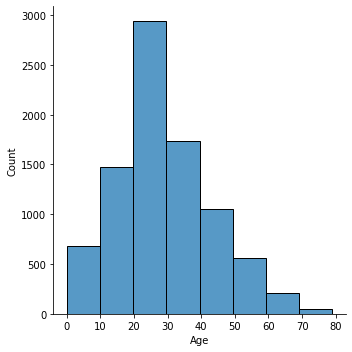

In [120]:
plt.figure(figsize=(14,8))
sns.displot(train_text['Age'], kde=False, bins=8)
plt.show()

# **Spa 分布圖 (長條圖)**

<Figure size 1008x576 with 0 Axes>

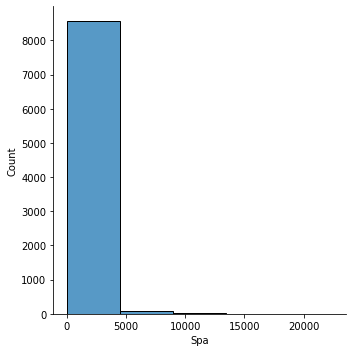

In [121]:
plt.figure(figsize=(14,8))
sns.displot(train_text['Spa'], kde=False, bins=5)
plt.show()

# **關於HomePlanet 跟Age 之間關係的長條圖**

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

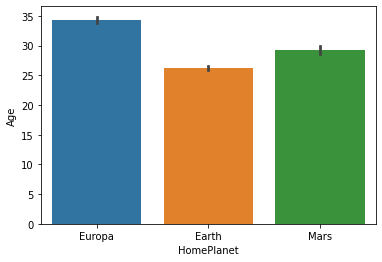

In [122]:
sns.barplot(x = "HomePlanet", y = "Age",data = train_text)

<AxesSubplot:xlabel='HomePlanet', ylabel='Age'>

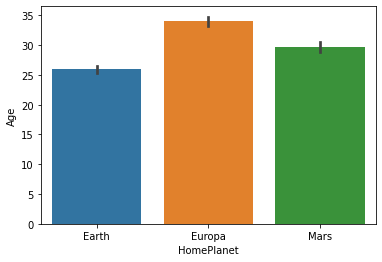

In [123]:
sns.barplot(x = "HomePlanet", y = "Age",data = test_text)

# **關於HomePlanet 跟CryoSleep 之間關係的長條圖**

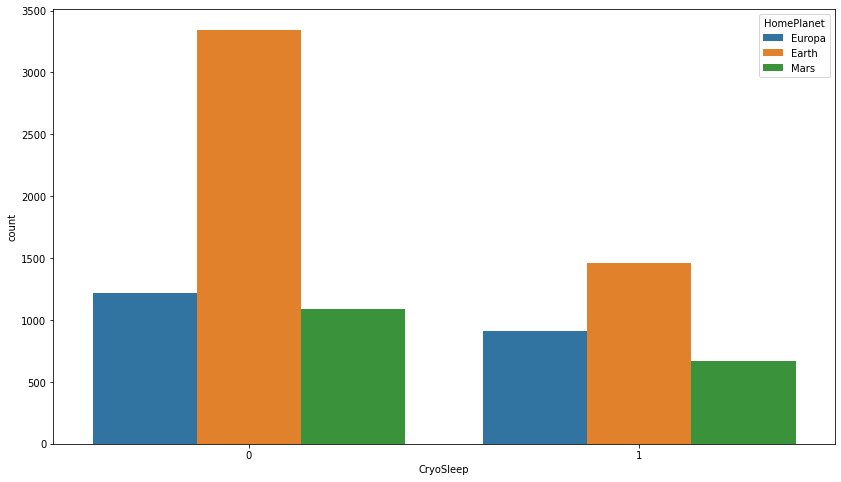

In [124]:
plt.figure(figsize=(14,8))
sns.countplot(data = train_text, x = 'CryoSleep', hue = 'HomePlanet')
plt.show()

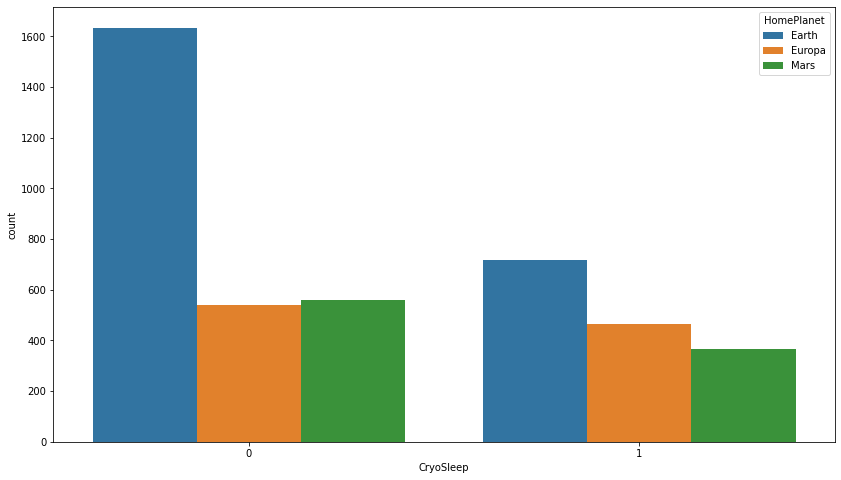

In [125]:
plt.figure(figsize=(14,8))
sns.countplot(data = test_text, x = 'CryoSleep', hue = 'HomePlanet')
plt.show()

In [126]:
train_text[train_text['HomePlanet'] == 'Europa']['HomePlanet'].value_counts()/len(train_text)


Europa    0.24514
Name: HomePlanet, dtype: float64

# **關於HomePlanet 跟Destination 之間關係的長條圖**

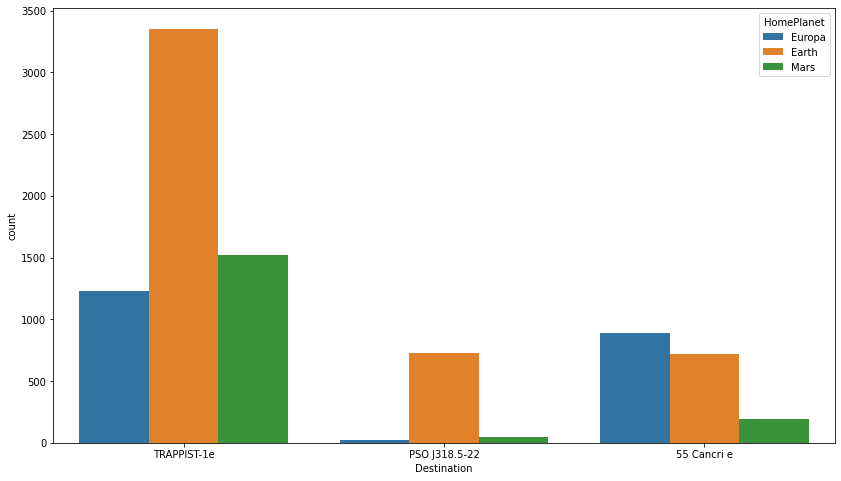

In [127]:
plt.figure(figsize=(14,8))
sns.countplot(data = train_text, x = 'Destination', hue = 'HomePlanet')
plt.show()

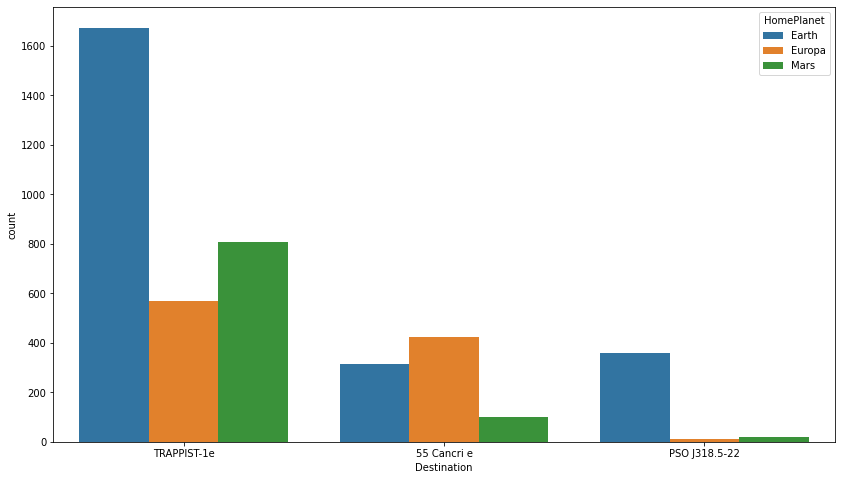

In [128]:
plt.figure(figsize=(14,8))
sns.countplot(data = test_text, x = 'Destination', hue = 'HomePlanet')
plt.show()

# **將 Name 欄去掉**

In [129]:
train_text = train_text.drop('Name', axis=1)

In [130]:
train_text.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39,0,0,0,0,0,0,0,B,0,P
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24,0,109,9,25,549,44,1,F,0,S
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58,1,43,3576,0,6715,49,0,A,0,S
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33,0,0,1283,371,3329,193,0,A,0,S
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16,0,303,70,151,565,2,1,F,1,S


In [131]:
test_text = test_text.drop('Name', axis=1)

In [132]:
test_text.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0013_01,Earth,1,G/3/S,TRAPPIST-1e,27,0,0,0,0,0,0,G,3,S
1,0018_01,Earth,0,F/4/S,TRAPPIST-1e,19,0,0,9,0,2823,0,F,4,S
2,0019_01,Europa,1,C/0/S,55 Cancri e,31,0,0,0,0,0,0,C,0,S
3,0021_01,Europa,0,C/1/S,TRAPPIST-1e,38,0,0,6652,0,181,585,C,1,S
4,0023_01,Earth,0,F/5/S,TRAPPIST-1e,20,0,10,0,635,0,0,F,5,S


In [133]:
train_text.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64

In [134]:
test_text.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Deck            0
Num             0
Side            0
dtype: int64

# **有缺失值在數據中將會有不同的顏色**

<AxesSubplot:>

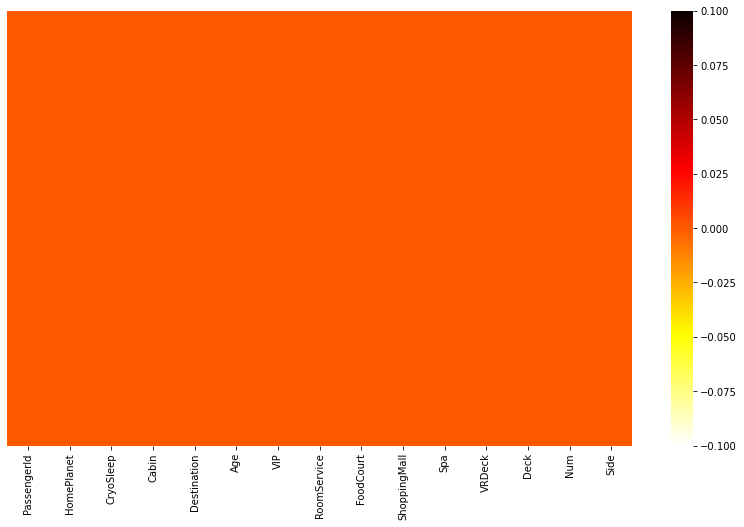

In [135]:
plt.figure(figsize=(14,8))
sns.heatmap(test_text.isnull(), yticklabels=False, cmap='hot_r')

<AxesSubplot:>

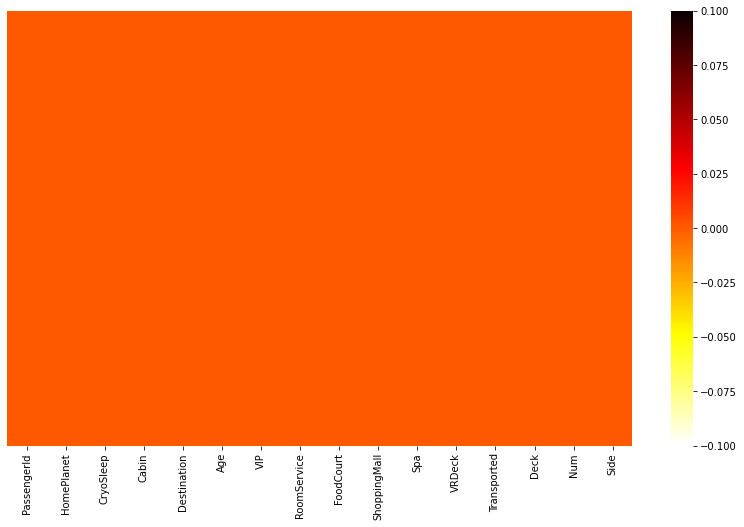

In [136]:
plt.figure(figsize=(14,8))
sns.heatmap(train_text.isnull(), yticklabels=False, cmap='hot_r')

# **關於Deck 跟Destination 之間關係的長條圖**

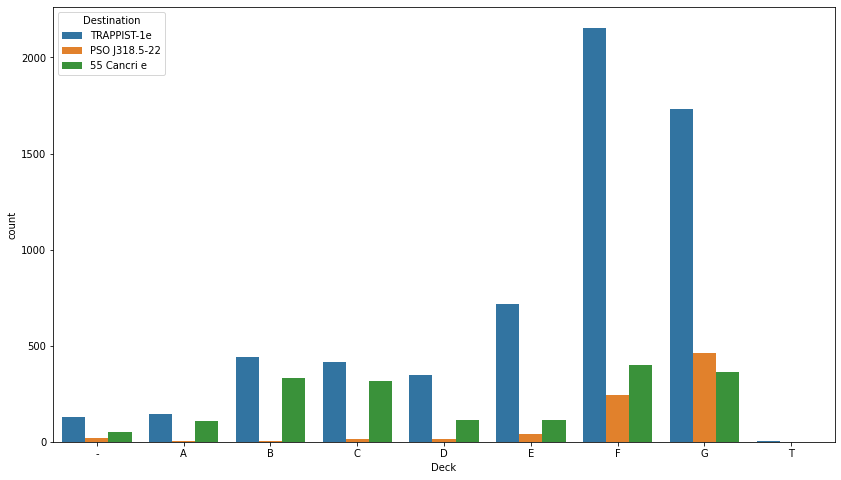

In [137]:
plt.figure(figsize=(14,8))
sns.countplot(data=train_text, x=train_text['Deck'].sort_values(), hue='Destination')
plt.show()

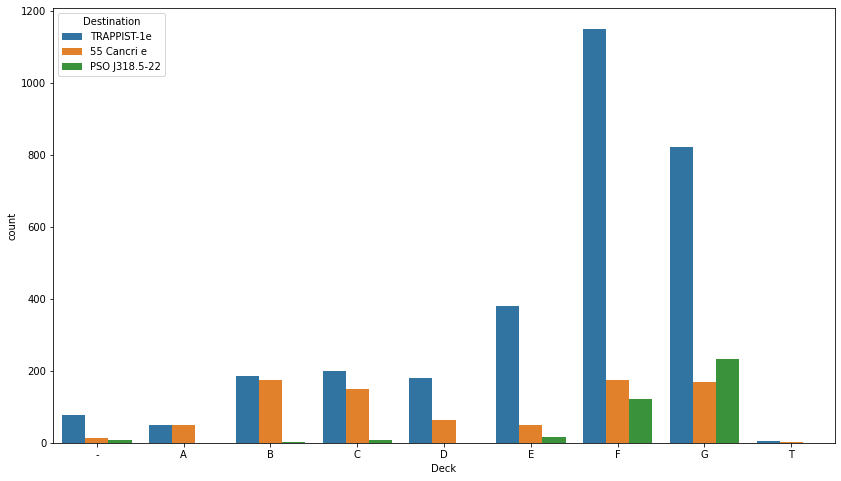

In [138]:
plt.figure(figsize=(14,8))
sns.countplot(data=test_text, x=test_text['Deck'].sort_values(), hue='Destination')
plt.show()

# **關於Side 跟Destination 之間關係的長條圖**

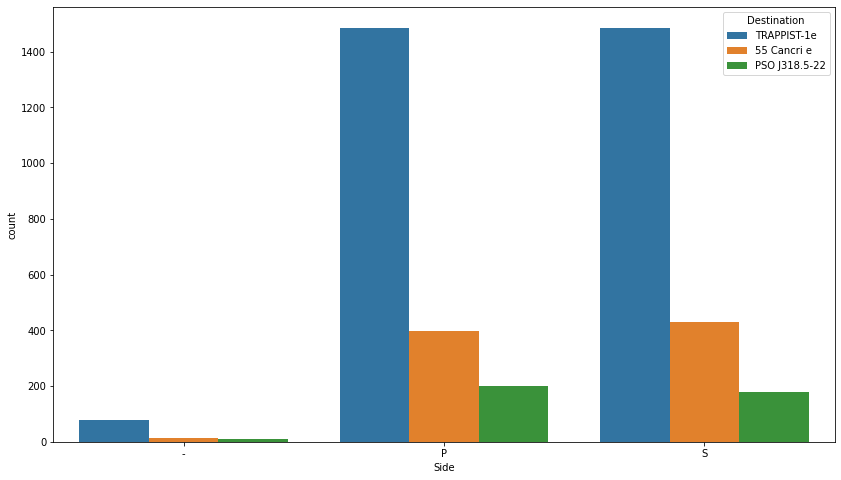

In [139]:
plt.figure(figsize=(14,8))
sns.countplot(data=test_text, x=test_text['Side'].sort_values(), hue='Destination')
plt.show()

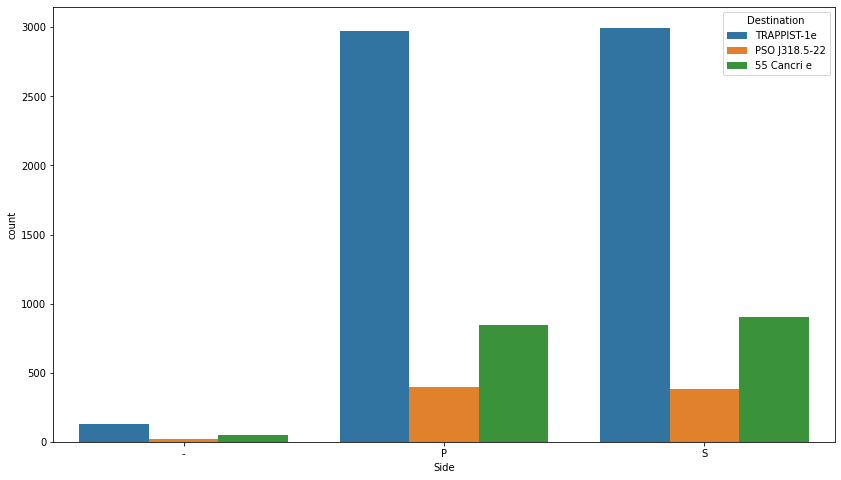

In [140]:
plt.figure(figsize=(14,8))
sns.countplot(data=train_text, x=train_text['Side'].sort_values(), hue='Destination')
plt.show()

# **關於HomePlanet 跟Transported 之間關係的長條圖**

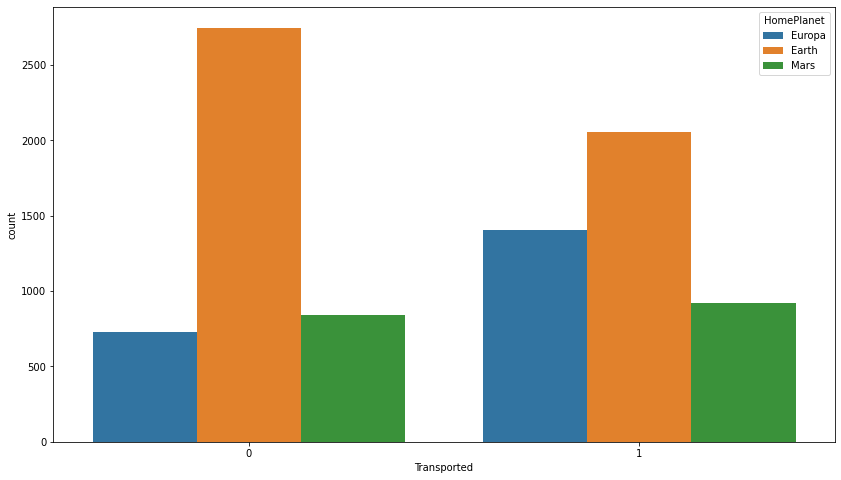

In [141]:
plt.figure(figsize=(14,8))
sns.countplot(data=train_text, x=train_text['Transported'].sort_values(), hue='HomePlanet')
plt.show()

# **關於Deck跟CryoSleep 之間關係的長條圖**

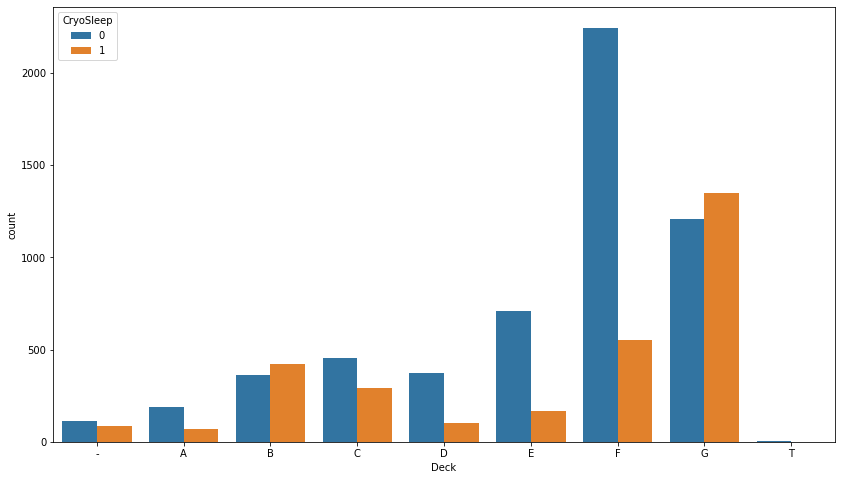

In [142]:
plt.figure(figsize=(14,8))
sns.countplot(data=train_text, x=train_text['Deck'].sort_values(), hue='CryoSleep')
plt.show()

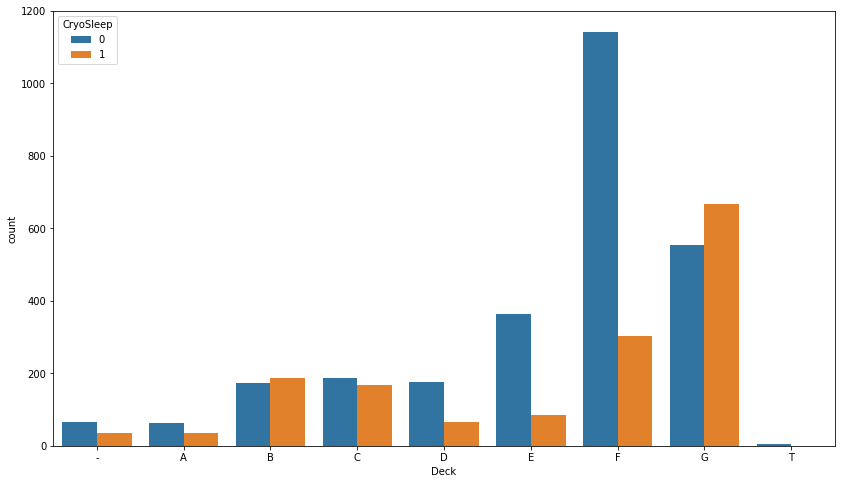

In [143]:
plt.figure(figsize=(14,8))
sns.countplot(data=test_text, x=test_text['Deck'].sort_values(), hue='CryoSleep')
plt.show()

# **將Deckep Side 的值分出來做判斷**

In [144]:
cabin_deck = pd.get_dummies(train_text['Deck'], drop_first=True)

In [145]:
cabin_side = pd.get_dummies(train_text['Side'], drop_first=True)

In [146]:
train_text = pd.concat([train_text,cabin_deck,cabin_side], axis=1)

In [147]:
train_text = train_text.drop(['Deck','Side'],axis=1)

In [148]:
cabin_deck_test = pd.get_dummies(test_text['Deck'], drop_first=True)

In [149]:
cabin_side_test = pd.get_dummies(test_text['Side'], drop_first=True)

In [150]:
test_text = pd.concat([test_text,cabin_deck_test,cabin_side_test], axis=1)

In [151]:
test_text = test_text.drop(['Deck','Side'],axis=1)

In [152]:
train_text = train_text.drop(['Num'],axis=1)

In [153]:
train_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   8693 non-null   object
 1   HomePlanet    8693 non-null   object
 2   CryoSleep     8693 non-null   int64 
 3   Cabin         8693 non-null   object
 4   Destination   8693 non-null   object
 5   Age           8693 non-null   int64 
 6   VIP           8693 non-null   int64 
 7   RoomService   8693 non-null   int64 
 8   FoodCourt     8693 non-null   int64 
 9   ShoppingMall  8693 non-null   int64 
 10  Spa           8693 non-null   int64 
 11  VRDeck        8693 non-null   int64 
 12  Transported   8693 non-null   int64 
 13  A             8693 non-null   uint8 
 14  B             8693 non-null   uint8 
 15  C             8693 non-null   uint8 
 16  D             8693 non-null   uint8 
 17  E             8693 non-null   uint8 
 18  F             8693 non-null   uint8 
 19  G     

In [154]:
test_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PassengerId   4277 non-null   object
 1   HomePlanet    4277 non-null   object
 2   CryoSleep     4277 non-null   int64 
 3   Cabin         4277 non-null   object
 4   Destination   4277 non-null   object
 5   Age           4277 non-null   int64 
 6   VIP           4277 non-null   int64 
 7   RoomService   4277 non-null   int64 
 8   FoodCourt     4277 non-null   int64 
 9   ShoppingMall  4277 non-null   int64 
 10  Spa           4277 non-null   int64 
 11  VRDeck        4277 non-null   int64 
 12  Num           4277 non-null   object
 13  A             4277 non-null   uint8 
 14  B             4277 non-null   uint8 
 15  C             4277 non-null   uint8 
 16  D             4277 non-null   uint8 
 17  E             4277 non-null   uint8 
 18  F             4277 non-null   uint8 
 19  G     

In [155]:
train_text = train_text.drop('PassengerId', axis=1)

In [156]:
train_text['Age'].groupby(train_text['HomePlanet']).median()

HomePlanet
Earth     24.0
Europa    32.0
Mars      28.0
Name: Age, dtype: float64

In [157]:
test_text['Age'].groupby(test_text['HomePlanet']).median()

HomePlanet
Earth     23.0
Europa    32.0
Mars      28.0
Name: Age, dtype: float64

In [158]:
train_text.isnull().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
A               0
B               0
C               0
D               0
E               0
F               0
G               0
T               0
P               0
S               0
dtype: int64

In [159]:
train_text = train_text.drop('Cabin',axis=1)

In [160]:
train_text.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
A               0
B               0
C               0
D               0
E               0
F               0
G               0
T               0
P               0
S               0
dtype: int64

# **將HomePlanet & Destination 轉為One hot 編碼表示**

In [161]:
data_dum_train = pd.get_dummies(train_text)
pd.DataFrame(data_dum_train)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,A,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,24,0,109,9,25,549,44,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0,16,0,303,70,151,565,2,1,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,1,0,6819,0,1643,74,0,1,...,0,0,1,0,0,1,0,1,0,0
8689,1,18,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
8690,0,26,0,0,0,1872,1,0,1,0,...,1,0,0,1,1,0,0,0,0,1
8691,0,32,0,0,1049,0,353,3235,0,0,...,0,0,0,1,0,1,0,1,0,0


# **將Cabin 去除**

In [162]:
data_dum_test = test_text.drop(['PassengerId','Num','Cabin'],axis=1)
#data_dum_test = test_text.drop('Num',axis=1)
#data_dum_test = test_text.drop('Cabin',axis=1)
data_dum_test = pd.get_dummies(data_dum_test)
pd.DataFrame(data_dum_test)
data_dum_test.head(10)
#data_dum_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0,19,0,0,9,0,2823,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38,0,0,6652,0,181,585,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20,0,10,0,635,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
5,0,31,0,0,1615,263,113,60,0,0,...,0,0,1,0,1,0,0,0,0,1
6,1,21,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0
7,1,20,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
8,1,23,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
9,0,24,0,0,639,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [163]:
data_dum_train.head(50)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,A,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,24,0,109,9,25,549,44,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0,16,0,303,70,151,565,2,1,0,...,0,0,0,1,1,0,0,0,0,1
5,0,44,0,0,483,0,291,0,1,0,...,0,0,1,0,1,0,0,0,1,0
6,0,26,0,42,1539,3,0,0,1,0,...,0,0,0,1,1,0,0,0,0,1
7,1,28,0,0,0,0,0,0,1,0,...,1,0,0,1,1,0,0,0,0,1
8,0,35,0,0,785,17,216,0,1,0,...,0,0,0,1,1,0,0,0,0,1
9,1,14,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0


In [164]:
data_dum_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,A,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,24,0,109,9,25,549,44,1,0,...,0,0,0,1,1,0,0,0,0,1
2,0,58,1,43,3576,0,6715,49,0,1,...,0,0,0,1,0,1,0,0,0,1
3,0,33,0,0,1283,371,3329,193,0,1,...,0,0,0,1,0,1,0,0,0,1
4,0,16,0,303,70,151,565,2,1,0,...,0,0,0,1,1,0,0,0,0,1


In [165]:
data_dum_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  8693 non-null   int64
 1   Age                        8693 non-null   int64
 2   VIP                        8693 non-null   int64
 3   RoomService                8693 non-null   int64
 4   FoodCourt                  8693 non-null   int64
 5   ShoppingMall               8693 non-null   int64
 6   Spa                        8693 non-null   int64
 7   VRDeck                     8693 non-null   int64
 8   Transported                8693 non-null   int64
 9   A                          8693 non-null   uint8
 10  B                          8693 non-null   uint8
 11  C                          8693 non-null   uint8
 12  D                          8693 non-null   uint8
 13  E                          8693 non-null   uint8
 14  F                       

# **將Transported 去除**

In [166]:
X_train = data_dum_train.drop('Transported',axis=1)

In [167]:
y_train = data_dum_train['Transported']

# **將Num 去除**

# **將X_test裡的PassengerId 去除**

In [168]:
X_test = data_dum_test

In [169]:
data_dum_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   CryoSleep                  4277 non-null   int64
 1   Age                        4277 non-null   int64
 2   VIP                        4277 non-null   int64
 3   RoomService                4277 non-null   int64
 4   FoodCourt                  4277 non-null   int64
 5   ShoppingMall               4277 non-null   int64
 6   Spa                        4277 non-null   int64
 7   VRDeck                     4277 non-null   int64
 8   A                          4277 non-null   uint8
 9   B                          4277 non-null   uint8
 10  C                          4277 non-null   uint8
 11  D                          4277 non-null   uint8
 12  E                          4277 non-null   uint8
 13  F                          4277 non-null   uint8
 14  G                       

In [170]:
data_dum_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0,19,0,0,9,0,2823,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38,0,0,6652,0,181,585,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20,0,10,0,635,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


# **模型架設**

# **LogisticRegression**

In [171]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C =100)

In [172]:
scores_list=[]

In [173]:
model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=100)

In [174]:
prediction= model.predict(X_test)
#scores_list.append(prediction)

# **評估結果**

In [175]:
model.score(X_train, y_train)
#scores_list.append(model.score(X_train,y_train))


0.7875301967099966

In [176]:
prediction = prediction.astype(str)

In [177]:
prediction = np.char.replace(prediction,'0','False')

In [178]:
prediction = np.char.replace(prediction,'1','True')

In [179]:
print(prediction)

['True' 'False' 'True' ... 'True' 'True' 'True']


In [180]:
spaceship_titanic_test = pd.DataFrame({'PassengerId':test_text['PassengerId'], 'Transported':prediction})

In [181]:
len(spaceship_titanic_test)

4277

# **輸出CSV**

In [182]:
spaceship_titanic_test.to_csv('logspaceship_titanic_l.csv', index=False)

# **SVC**

In [183]:
from sklearn.svm import SVC
svm_model = SVC(C=10,kernel='rbf',degree=4)

In [184]:
svm_model.fit(X_train,y_train)

SVC(C=10, degree=4)

In [185]:
svm_predicti = svm_model.predict(X_test)

In [186]:
svm_model.score(X_train,y_train)
#scores_list.append(svm_model.score(X_train,y_train))

0.7942022316806626

In [187]:
svm_predicti

array([1, 0, 1, ..., 1, 1, 1])

In [188]:
svm_predicti = svm_predicti.astype(str)

In [189]:
svm_predicti= np.char.replace(svm_predicti,'0','False')

In [190]:
svm_predicti= np.char.replace(svm_predicti,'1','True')

In [191]:
svm_predicti.shape

(4277,)

In [192]:
print(svm_predicti)

['True' 'False' 'True' ... 'True' 'True' 'True']


In [193]:
spaceship_titanic_test = pd.DataFrame({'PassengerId':test_text['PassengerId'], 'Transported':svm_predicti})

# **輸出CSV**

In [194]:
spaceship_titanic_test.to_csv('logspaceship_titanic_s.csv', index=False)

In [195]:
text = pd.read_csv("../input/codegoalno1/logspaceship_titanic_s.csv")
text

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


In [196]:
from sklearn.svm import LinearSVC 

In [197]:
X_test.shape

(4277, 24)

# **KNeighborsClassifier**

In [198]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier()
clf.fit(X_train,y_train)
#kscore=clf.score(X_test,y_test)
#print("The score is: ",kscore)
#scores_list.append(kscore)


KNeighborsClassifier()

In [199]:
clpred = clf.predict(X_test)

In [200]:
clpred

array([1, 0, 1, ..., 1, 1, 0])

In [201]:
clpred = clpred.astype(str)

In [202]:
clpred = np.char.replace(clpred,'0','False')

In [203]:
clpred = np.char.replace(clpred,'1','True')

In [204]:
clpred

array(['True', 'False', 'True', ..., 'True', 'True', 'False'], dtype='<U5')

In [205]:
submissionk = pd.DataFrame(
    {'PassengerId':test_text["PassengerId"] ,
     'Transported': clpred},columns=['PassengerId', 'Transported'])

# **輸出CSV**

In [206]:
submissionk.to_csv("submissionkn.csv",index=False)

In [207]:
text = pd.read_csv('./submissionkn.csv')
text
text

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True


# **RandomForestClassifier**

In [208]:
from sklearn.ensemble import RandomForestClassifier
clfr=RandomForestClassifier(max_depth=10, random_state=42)
clfr.fit(X_train,y_train)
rpred =clfr.predict(X_test)

#rscore=clfr.score(X_test,y_test)
#print("The score is: ",rscore)
#scores_list.append(rscore)


In [209]:
rpred

array([1, 0, 1, ..., 1, 1, 1])

In [210]:
rpred = rpred.astype(str)

In [211]:
rpred = np.char.replace(rpred,'0','False')

In [212]:
rpred = np.char.replace(rpred,'1','True')

In [213]:
rpred

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype='<U5')

In [214]:
submissionr = pd.DataFrame(
    {'PassengerId':test_text["PassengerId"] ,
     'Transported': rpred},columns=['PassengerId', 'Transported'])

# **輸出CSV**

In [215]:
submissionr.to_csv("submissionr.csv",index=False)

In [216]:
text = pd.read_csv('./submissionr.csv')
text

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


# **GridSearch**

In [217]:
rf_grid={
    "n_estimators":[None,100,200,300,400],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,5,10,15,20,25],
    'criterion' :['gini', 'entropy']
 }
final_class=['Random Forest']
final_scores=[]


In [218]:
from sklearn.model_selection import GridSearchCV
rf_clf=GridSearchCV(estimator=RandomForestClassifier(),param_grid=rf_grid,n_jobs=1,cv=5,verbose=True)

#Fit the model
rf_clf.fit(X_train,y_train)

#Score and Store the model
#final_scores.append(rf_clf.score(X_test,y_test))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_base.py", line 133, in _validate_estimator
    type(self.n_estimators)
ValueError: n_estimators must be an integer, got <clas

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [None, 100, 200, 300, 400]},
             verbose=True)

In [219]:
print("Best parameters: {}".format(rf_clf.best_params_))

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 400}


In [220]:
#final_sb=pd.DataFrame(list(zip(final_class,final_scores)),columns=['Classifier','Score'])
#final_sb

In [221]:
rf= rf_clf.predict(X_test)

In [222]:
rf_clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [None, 100, 200, 300, 400]},
             verbose=True)

In [223]:
rf = rf.astype(str)

In [224]:
rf = np.char.replace(rf,'0','False')

In [225]:
rf = np.char.replace(rf,'1','True')

In [226]:
rf

array(['True', 'False', 'True', ..., 'True', 'True', 'True'], dtype='<U5')

In [227]:
submissiongr = pd.DataFrame(
    {'PassengerId':test_text["PassengerId"] ,
     'Transported': rf},columns=['PassengerId', 'Transported'])#

# **輸出CSV**

In [228]:
submissiongr.to_csv("submissiongr.csv",index=False)

In [229]:
textgr = pd.read_csv('./submissiongr.csv')
textgr

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [230]:
X_test

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,0,19,0,0,9,0,2823,0,0,0,...,0,0,0,1,1,0,0,0,0,1
2,1,31,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
3,0,38,0,0,6652,0,181,585,0,0,...,0,0,0,1,0,1,0,0,0,1
4,0,20,0,10,0,635,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1,34,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4273,0,42,0,0,847,17,10,144,0,0,...,0,0,0,0,1,0,0,0,0,1
4274,1,28,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4275,0,28,0,0,2680,0,0,523,0,0,...,0,0,1,0,0,1,0,0,0,1


In [231]:
X_train

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,...,G,T,P,S,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
1,0,24,0,109,9,25,549,44,0,0,...,0,0,0,1,1,0,0,0,0,1
2,0,58,1,43,3576,0,6715,49,1,0,...,0,0,0,1,0,1,0,0,0,1
3,0,33,0,0,1283,371,3329,193,1,0,...,0,0,0,1,0,1,0,0,0,1
4,0,16,0,303,70,151,565,2,0,0,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,41,1,0,6819,0,1643,74,1,0,...,0,0,1,0,0,1,0,1,0,0
8689,1,18,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
8690,0,26,0,0,0,1872,1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
8691,0,32,0,0,1049,0,353,3235,0,0,...,0,0,0,1,0,1,0,1,0,0


In [232]:
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [233]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(sample_text.Transported, textgr.Transported, labels=[True,False], sample_weight=None)

In [234]:
#print(cm)

In [235]:
#sns.heatmap(cm,annot=True)



In [236]:
sample_text.head(40)

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
5,0027_01,False
6,0029_01,False
7,0032_01,False
8,0032_02,False
9,0033_01,False


In [237]:
#textgr.head(40)

In [238]:
from sklearn.metrics import ConfusionMatrixDisplay
#cm1 = confusion_matrix(textgr.Transported,sample_text.Transported,labels = clfr.classes_)
#display = ConfusionMatrixDisplay(confusion_matrix = cm1, display_labels = clfr.classes_)
#display.plot()
#plt.show()

In [239]:
from sklearn.tree import DecisionTreeRegressor 

# **DecisionTreeRegressor**

In [240]:
dct = DecisionTreeRegressor(
    criterion='squared_error',
    splitter='best',
    min_samples_split=4,
)

In [241]:
dct.fit(
    X_train, 
    y_train
)

DecisionTreeRegressor(min_samples_split=4)

In [242]:
predictiondc = dct.predict(X_test)

In [243]:
predictiondc

array([0.66666667, 0.        , 1.        , ..., 1.        , 0.5       ,
       0.33333333])

In [244]:
predictiondc = predictiondc.astype(int)

In [245]:
predictiondc

array([0, 0, 1, ..., 1, 0, 0])

In [246]:
predictiondc = predictiondc.astype(str)

In [247]:
predictiondc

array(['0', '0', '1', ..., '1', '0', '0'], dtype='<U21')

In [248]:
predictiondc = np.char.replace(predictiondc,'0','False')

In [249]:
predictiondc = np.char.replace(predictiondc,'1','True')

In [250]:
predictiondc

array(['False', 'False', 'True', ..., 'True', 'False', 'False'],
      dtype='<U5')

In [251]:
submissiondct = pd.DataFrame(
    {'PassengerId':test_text["PassengerId"] ,
     'Transported': predictiondc},columns=['PassengerId', 'Transported'])

In [252]:
submissiondct.to_csv("submissiondct.csv",index=False)

# **輸出CSV**

In [253]:
textdct = pd.read_csv('./submissiondct.csv')
textdct

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
